In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cmocean as cm
import numpy as np
from dask.distributed import Client
import xarray as xr
import cf_xarray as cfxr
client = Client()
client

import os
os.getcwd()

%cd /g/data/p66/ars599/work_rp2/
#arr = os.listdir()
#arr

/g/data/p66/ars599/work_rp2


In [20]:
period_time = ["0301-01-01", "0399-12-01", "0300-01-01", "0310-01-01"]
# read netcdf file
idir = "/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/"
ds1 = xr.open_dataset(idir+'piControl/r1i2p1f1/Amon/ts/gn/v20230523/ts_Amon_ACCESS-CM2_piControl_r1i2p1f1_gn_030101-040012.nc')
ds2 = xr.open_dataset(idir+'piControl/r1i2p1f2/Amon/ts/gn/v20230523/ts_Amon_ACCESS-CM2_piControl_r1i2p1f2_gn_030001-039912.nc')
ds3 = xr.open_dataset(idir+'piControl/r1i2p1f3/Amon/ts/gn/v20230523/ts_Amon_ACCESS-CM2_piControl_r1i2p1f3_gn_030001-039912.nc')
ds4 = xr.open_dataset(idir+'piControl/r1i2p1f4/Amon/ts/gn/v20230604/ts_Amon_ACCESS-CM2_piControl_r1i2p1f4_gn_030001-031012.nc')

def calculate_ts_mean(ds, ptime1, ptime2):
    ts = ds.ts
    ts = ts.sel(time=slice(ptime1, ptime2))
    ts = ts.cf.mean("time")
    return ts

ts1 = calculate_ts_mean(ds1, period_time[0], period_time[1])
ts2 = calculate_ts_mean(ds2, period_time[0], period_time[1])
ts3 = calculate_ts_mean(ds3, period_time[0], period_time[1])
ts4 = calculate_ts_mean(ds4, period_time[2], period_time[3])

ts1

<xarray.DataArray 'ts' (lat: 144, lon: 192)>
array([[227.3967 , 227.39764, 227.4017 , ..., 227.4039 , 227.40114,
        227.39922],
       [228.61302, 228.55179, 228.48468, ..., 228.8487 , 228.75943,
        228.68234],
       [229.48947, 229.35315, 229.22351, ..., 229.95874, 229.78877,
        229.63477],
       ...,
       [255.60373, 255.65244, 255.70148, ..., 255.4546 , 255.50697,
        255.55623],
       [255.24873, 255.27254, 255.29518, ..., 255.17047, 255.19766,
        255.22412],
       [254.96596, 254.97365, 254.97873, ..., 254.9424 , 254.95009,
        254.95706]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

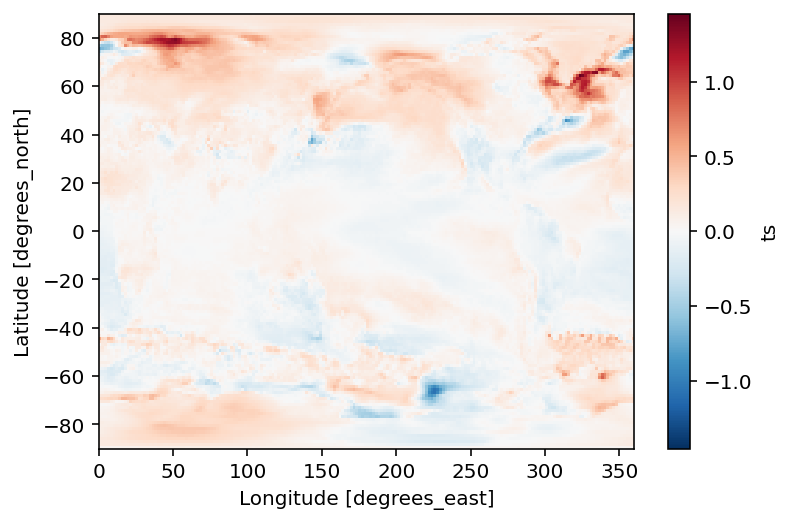

In [21]:
'''
ds1 cj877
ds2 cq880
ds3 cq880C
'''

ts_diff = ts1-ts3
ts_diff.plot()

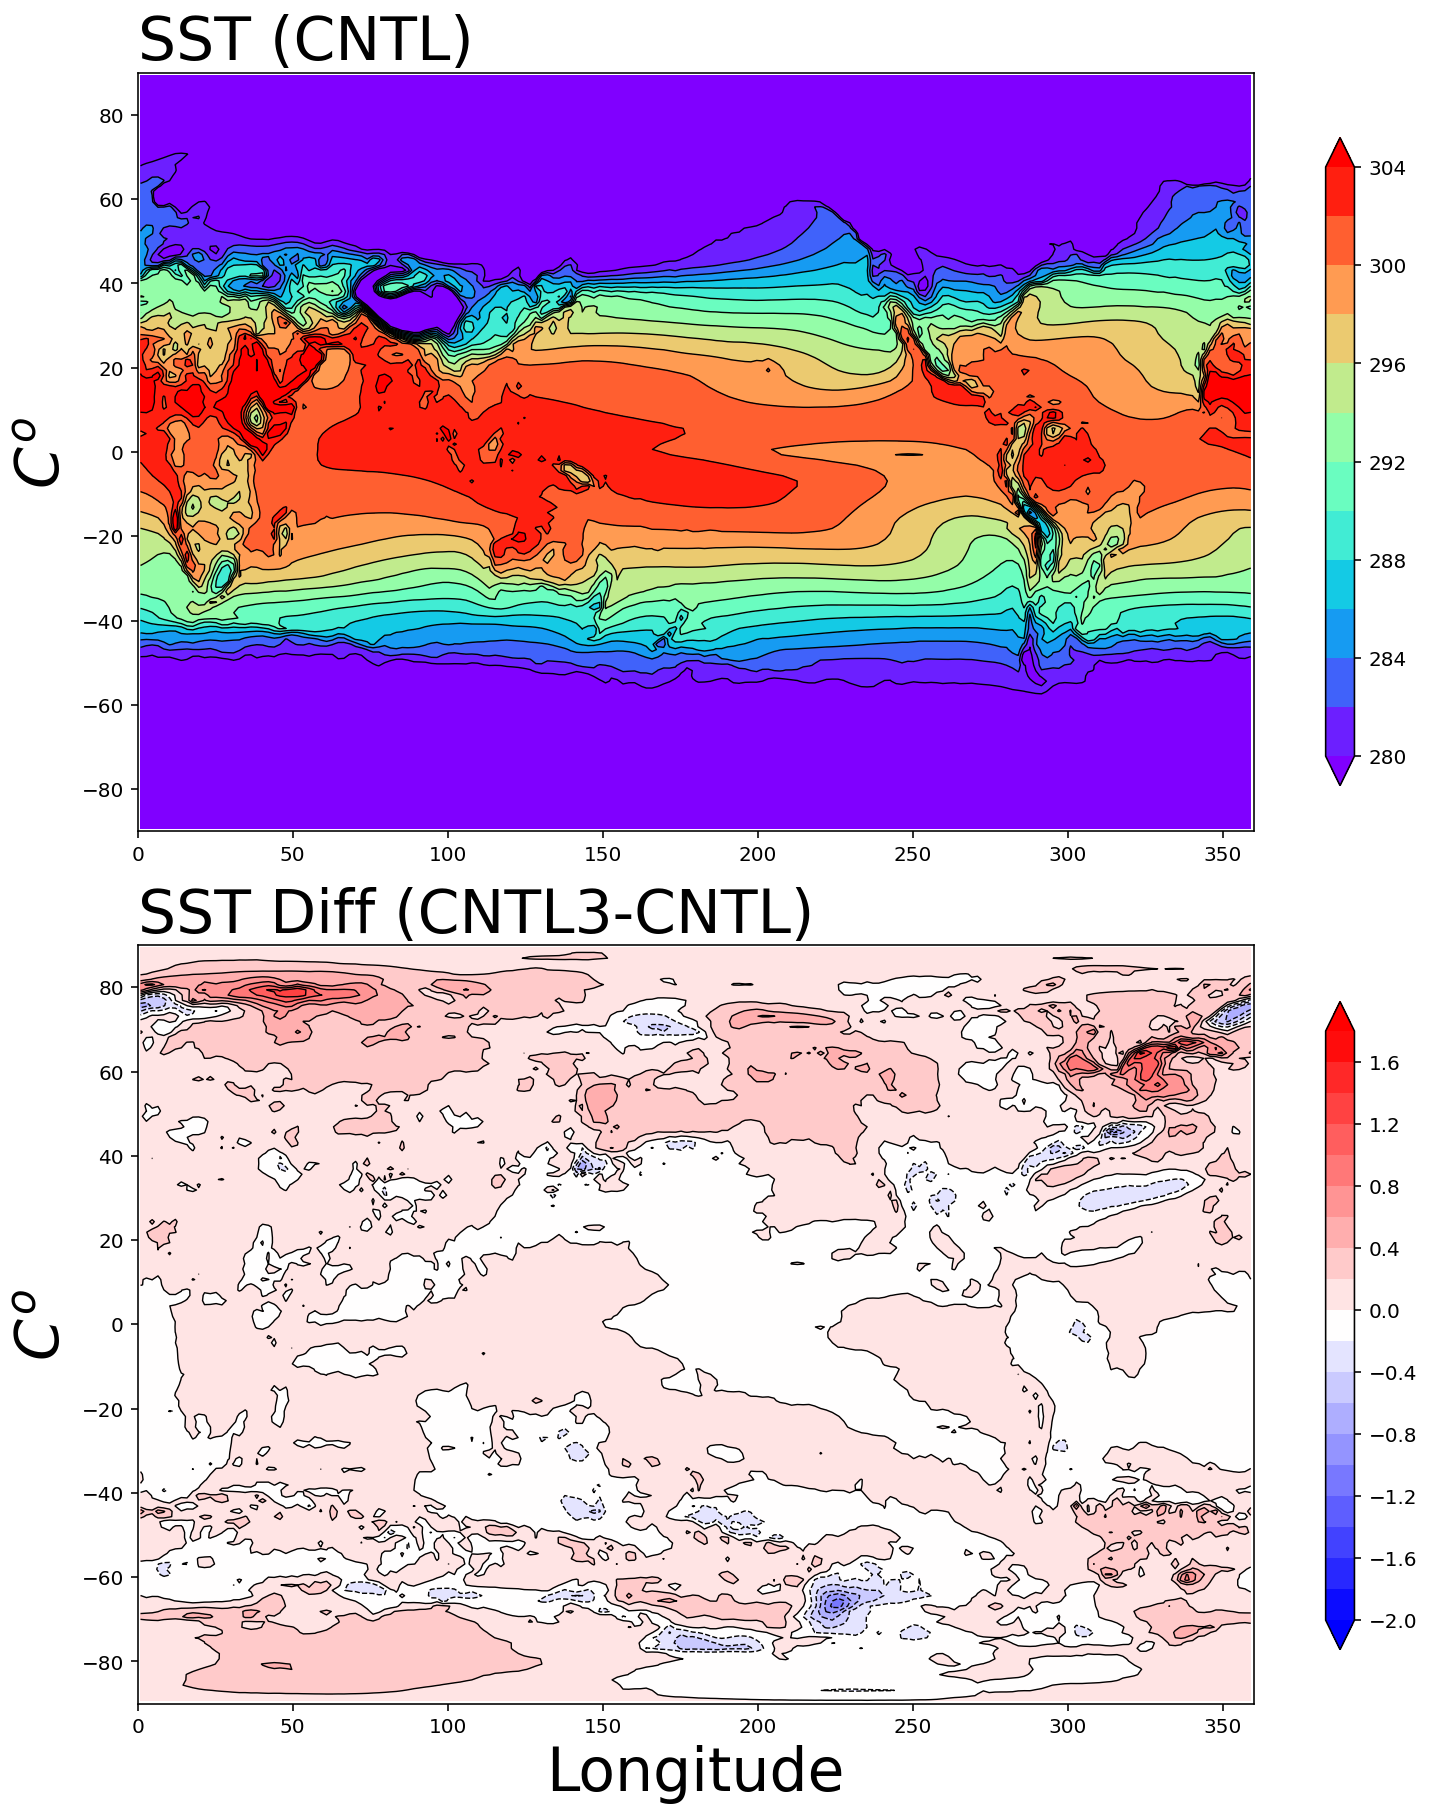

In [22]:
## linear y axis
clev0=np.arange(280,306,2)
clev=np.arange(-2.,2.,.2)
fig=plt.figure(1,(10,15))
gs = gridspec.GridSpec(2,1) 
ax, ax0 = plt.subplot(gs[0]),plt.subplot(gs[1])
gs.update(hspace = 0.15)

plot = ax.contourf(ts3.lon, ts3.lat, ts3, cmap='rainbow', levels=clev0,extend='both')
ax.contour(ts3.lon, ts3.lat, ts3, levels=clev0, colors='k', linewidths=0.7)
#ax.set_ylabel(r'$\sigma_2$ (kg m$^{-3}$)', fontsize = 30)
ax.set_ylabel(r'$C^o$', fontsize = 30)
ax.set_xlim([0,360])
ax.set_ylim([-90,90])
# plt.setp(ax.get_xaxis(),visible=False)
ax.set_title(r'SST (CNTL)', fontsize = 30,loc = 'left')

plot0 = ax0.contourf(ts_diff.lon, ts_diff.lat, ts_diff, cmap='bwr', levels=clev,extend='both')
ax0.contour(ts_diff.lon, ts_diff.lat, ts_diff,levels=clev, colors='k', linewidths=0.7)
#ax0.set_ylabel(r'$\sigma_2$ (kg m$^{-3}$)', fontsize = 30)
ax0.set_ylabel(r'$C^o$', fontsize = 30)
ax0.set_xlabel(r'Longitude', fontsize = 30)
ax0.set_xlim([0,360])
ax0.set_ylim([-90,90])
ax0.set_title(r'SST Diff (CNTL3-CNTL)', fontsize = 30,loc = 'left')

cax = plt.axes([0.95, 0.55, 0.02, 0.3])
cb=plt.colorbar(plot,cax = cax,orientation='vertical')
cb.ax.set_xlabel(r'$\Psi$ (Sv)', fontsize = 30)

cax2 = plt.axes([0.95, 0.15, 0.02, 0.3])
cb2=plt.colorbar(plot0,cax = cax2,orientation='vertical')
cb2.ax.set_xlabel(r'$\Psi$ (Sv)', fontsize = 30)

plt.savefig('cntl3-cntl_cq880_sst.png')
plt.show()

In [23]:
start_time = "1850-01-01"
end_time = "1885-01-01"
inFile="/g/data/p66/ars599/obs/month/ERA5_1979-2019_N96_sst.nc"
ds0 = xr.open_mfdataset(inFile, combine='by_coords')

ts = ds0.sst
ts = ts.sel(time=slice(start_time, end_time))
ts = ts.cf.mean("time")

ts

<xarray.DataArray 'sst' (lat: 144, lon: 192)>
dask.array<mean_agg-aggregate, shape=(144, 192), dtype=float32, chunksize=(144, 192), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38

In [24]:
ts0 = ds0.sst
ts0 = ts0.sel(time=slice(start_time, end_time))

ts0 = ds0['sst'].reindex(lat=ds1['lat'], lon=ds1['lon'], method='nearest')
ts0 = ts0.cf.mean("time")

ts10=ts1-273.15-ts0 # ctrl - obs
ts20=ts2-273.15-ts0 # ctrl2 - obs
ts30=ts3-273.15-ts0 # ctrl3 - obs
ts40=ts4-273.15-ts0 # ctrl4 - obs

print(np.amax(ts10).values)
print(np.amax(ts20).values)
print(np.amax(ts30).values)
print(np.amax(ts40).values)


7.4162235
7.3308353
7.4691257
7.4237614


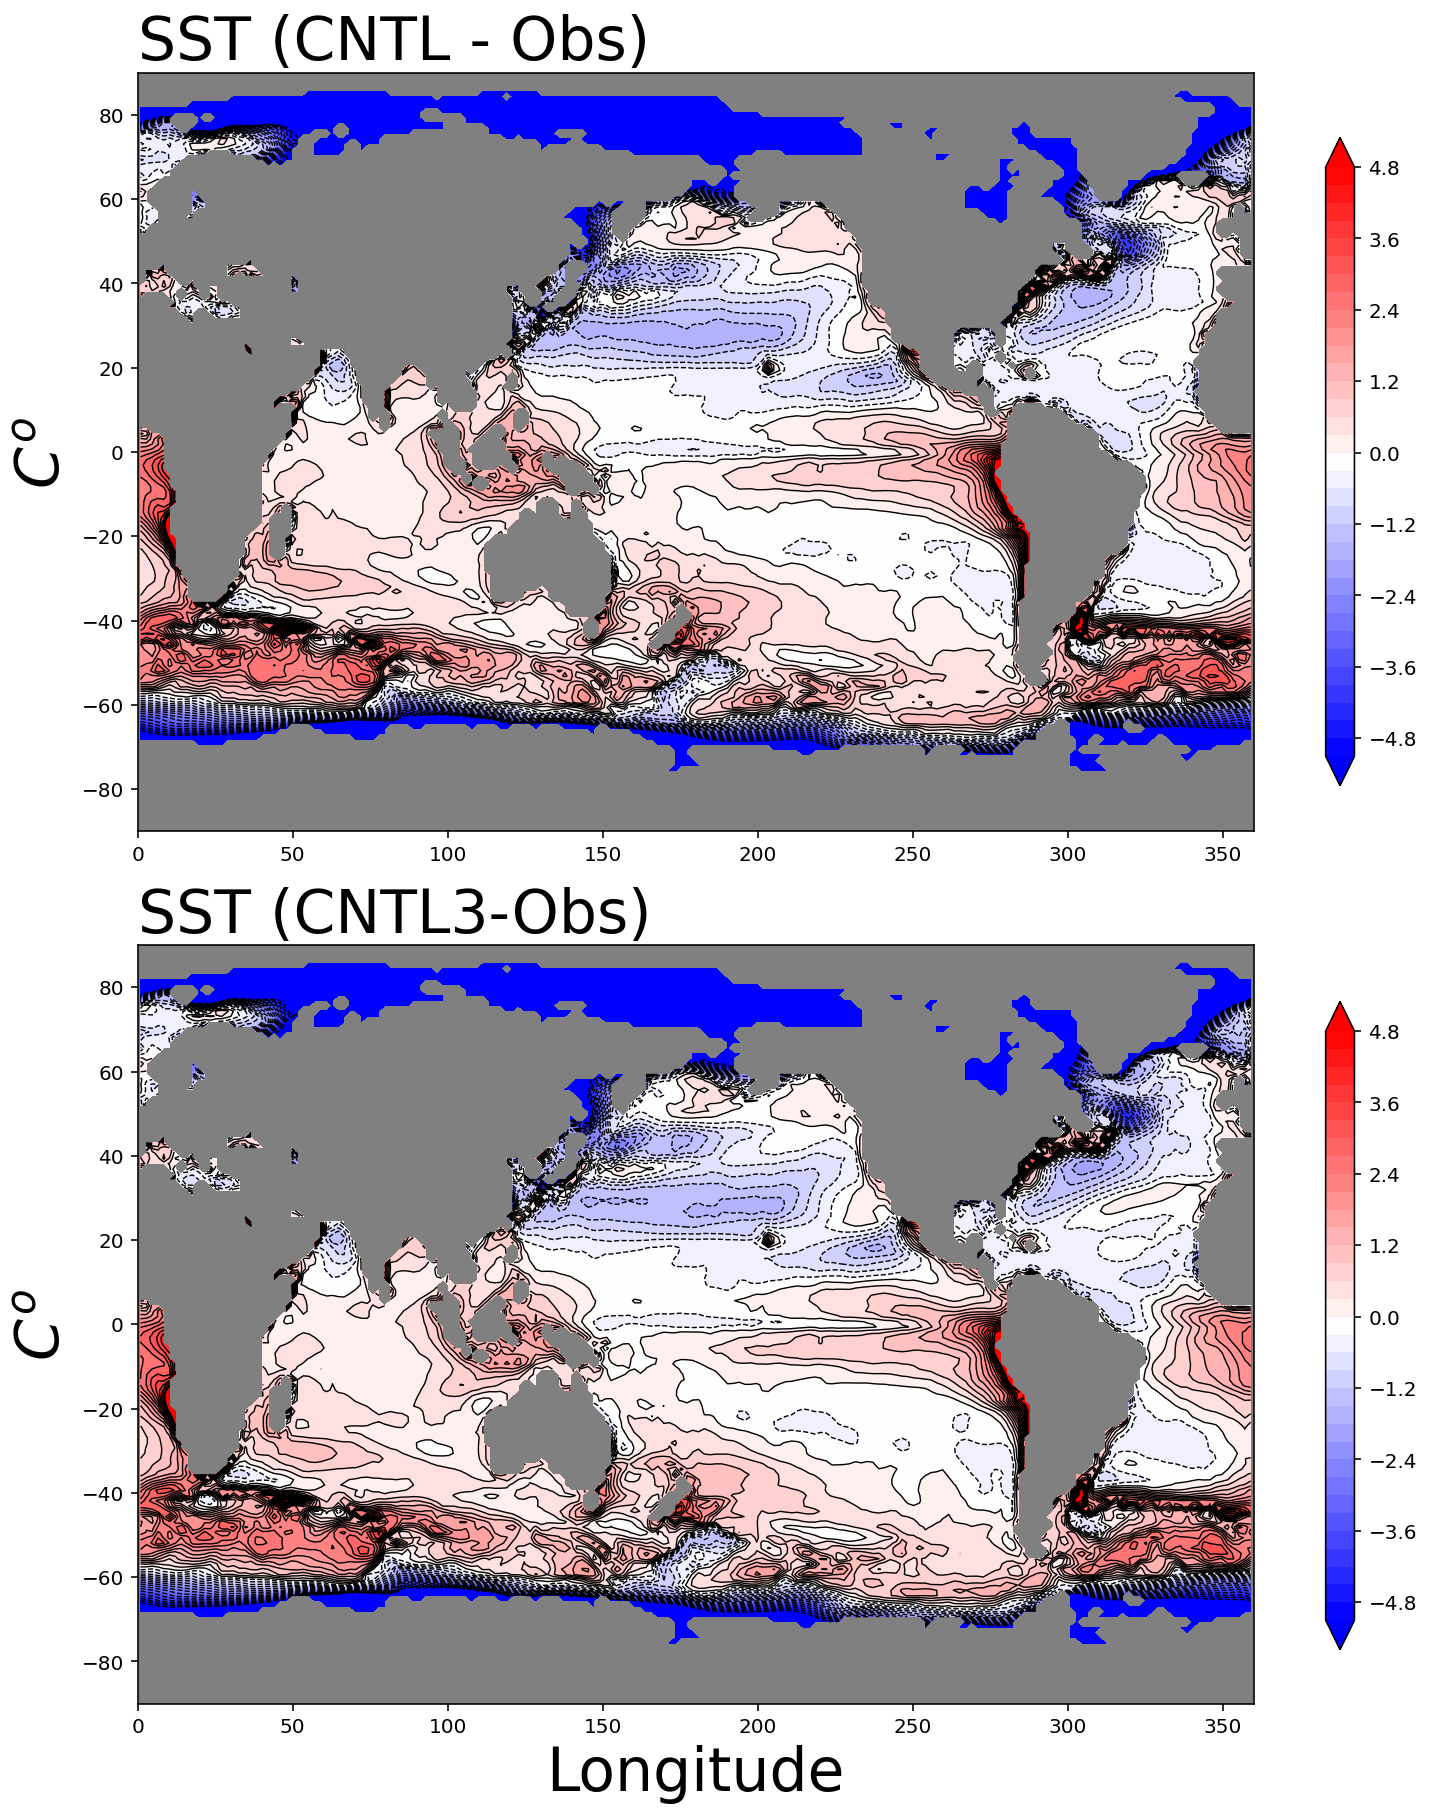

In [25]:
## linear y axis
clev=np.arange(-5.1,5.1,.3)
fig=plt.figure(1,(10,15))
gs = gridspec.GridSpec(2,1) 
ax, ax0 = plt.subplot(gs[0]),plt.subplot(gs[1])
gs.update(hspace = 0.15)

plot = ax.contourf(ts10.lon, ts10.lat, ts10, cmap='bwr', levels=clev,extend='both')
ax.contour(ts10.lon, ts10.lat, ts10, levels=clev, colors='k', linewidths=0.7)
#ax.set_ylabel(r'$\sigma_2$ (kg m$^{-3}$)', fontsize = 30)
ax.set_ylabel(r'$C^o$', fontsize = 30)
ax.set_xlim([0,360])
ax.set_ylim([-90,90])
# plt.setp(ax.get_xaxis(),visible=False)
ax.set_title(r'SST (CNTL - Obs)', fontsize = 30,loc = 'left')

plot0 = ax0.contourf(ts30.lon, ts30.lat, ts30, cmap='bwr', levels=clev,extend='both')
ax0.contour(ts30.lon, ts30.lat, ts30,levels=clev, colors='k', linewidths=0.7)
#ax0.set_ylabel(r'$\sigma_2$ (kg m$^{-3}$)', fontsize = 30)
ax0.set_ylabel(r'$C^o$', fontsize = 30)
ax0.set_xlabel(r'Longitude', fontsize = 30)
ax0.set_xlim([0,360])
ax0.set_ylim([-90,90])
ax0.set_title(r'SST (CNTL3-Obs)', fontsize = 30,loc = 'left')

cax = plt.axes([0.95, 0.55, 0.02, 0.3])
cb=plt.colorbar(plot,cax = cax,orientation='vertical')
#cb.ax.set_xlabel(r'$\Psi$ (Sv)', fontsize = 30)

cax2 = plt.axes([0.95, 0.15, 0.02, 0.3])
cb2=plt.colorbar(plot0,cax = cax2,orientation='vertical')
#cb2.ax.set_xlabel(r'$\Psi$ (Sv)', fontsize = 30)

ax.set_facecolor('grey')
ax0.set_facecolor('grey')
plt.savefig('cntl3-cntl_cq880-obs_sst.png')
plt.show()

* SST bias over two ctrl runs
>1. ctrl is the PD original run
>2. ctrl2 is the PD with RP2 run

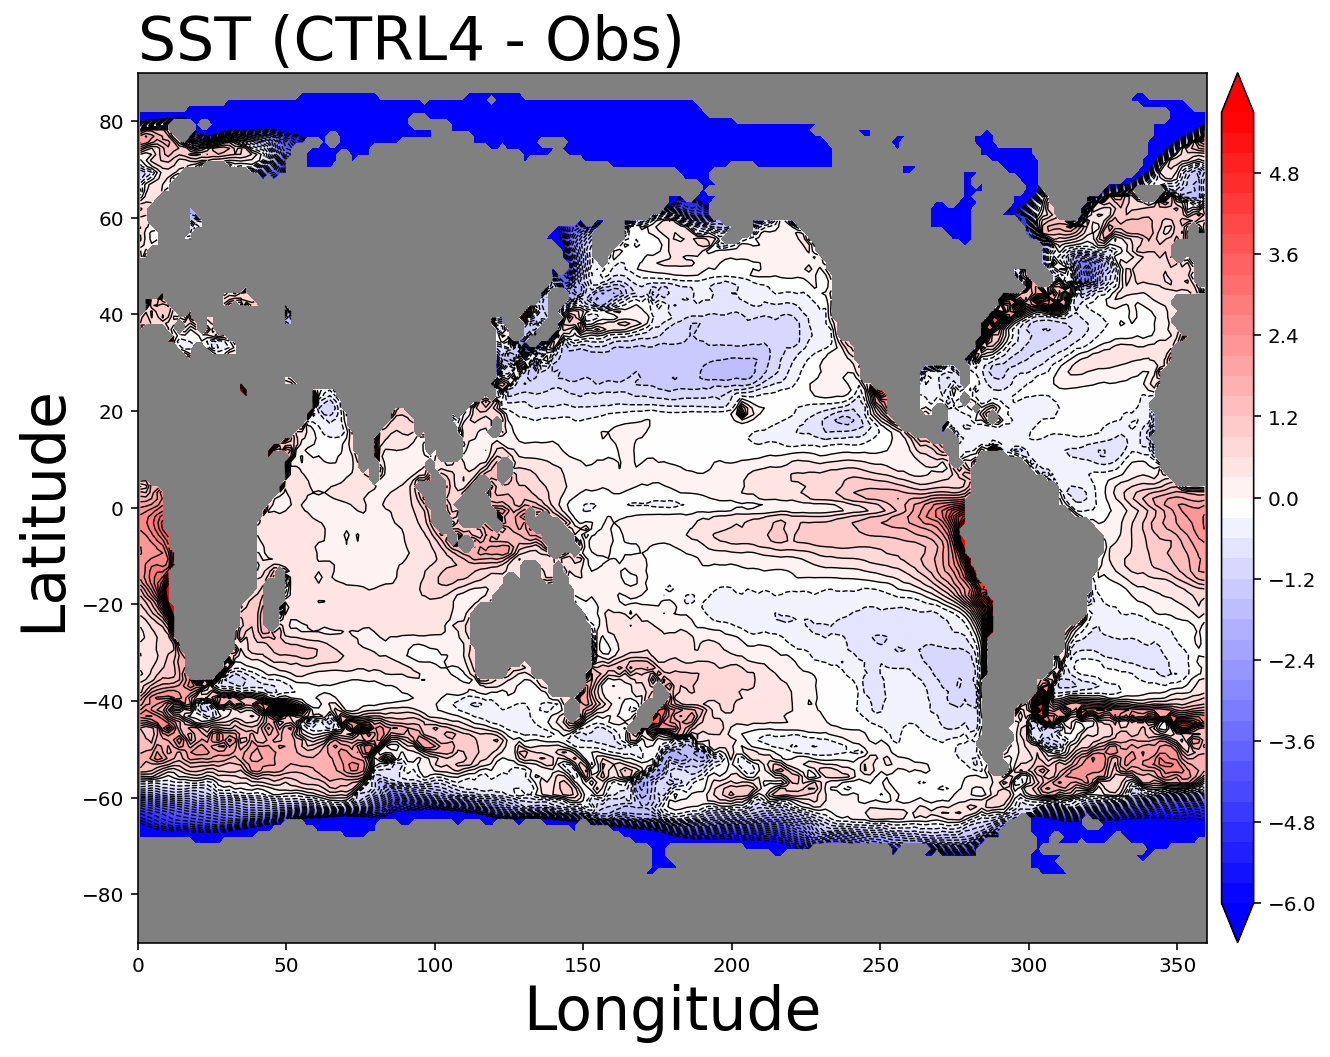

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

clev = np.arange(-6, 6, 0.3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plot = ax.contourf(ts40.lon, ts40.lat, ts40, cmap='bwr', levels=clev, extend='both')
ax.contour(ts40.lon, ts40.lat, ts40, levels=clev, colors='k', linewidths=0.7)

ax.set_xlabel('Longitude', fontsize=30)
ax.set_ylabel('Latitude', fontsize=30)
ax.set_xlim([0, 360])
ax.set_ylim([-90, 90])
ax.set_title('SST (CTRL4 - Obs)', fontsize=30, loc='left')

# Create colorbar in a separate axes
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.1)
cb = plt.colorbar(plot, cax=cax, orientation='vertical')

ax.set_facecolor('grey')
plt.savefig('ctrl4-obs_sst.png')
plt.show()


# pdControl for cntl and rp2 runs

In [5]:
'''
All the Functions
'''
def calculate_1d_anom(var):
    var_raw = var.mean(['lat', 'lon'])
    var_clim = var_raw.groupby("time.month").mean(dim="time")
    var_anom = var_raw.groupby("time.month") - var_clim
    return var_anom

def calculate_anom(var):
    var_clim = var.groupby("time.month").mean(dim="time")
    var_anom = var.groupby("time.month") - var_clim
    return var_anom

# -- Detorending
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

In [22]:
# --- read data ---
idir = '/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/'
t1Name = 'r1i1p2f1/Amon/ts/gn/v20230616/ts_Amon_ACCESS-CM2_piControl_r1i1p2f1_gn_050001-059912.nc'
t_in = xr.open_dataset(idir+t1Name)
year_start = 550
year_end = 599
t_ds = t_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 144

ts24 = t_ds['ts'].mean('time')

In [23]:
t1Name = 'r1i1p3f1/Amon/ts/gn/v20230517/ts_Amon_ACCESS-CM2_piControl_r1i1p3f1_gn_050001-059912.nc'
t_in = xr.open_dataset(idir+t1Name)
year_start = 550
year_end = 599
t_ds = t_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 144

ts34 = t_ds['ts'].mean('time')

In [24]:
start_time = "1979-01-01"
end_time = "2000-01-01"
inFile="/g/data/p66/ars599/obs/month/ERA5_1979-2019_N96_sst.nc"
ds0 = xr.open_mfdataset(inFile, combine='by_coords')

ts = ds0['sst'].reindex(lat=t_ds['lat'], lon=t_ds['lon'], method='nearest')
ts = ts.cf.mean("time")

ts240 = ts24-273.15-ts # ctrl2 rp2 - obs
ts340 = ts34-273.15-ts # ctrl3 ctrl - obs

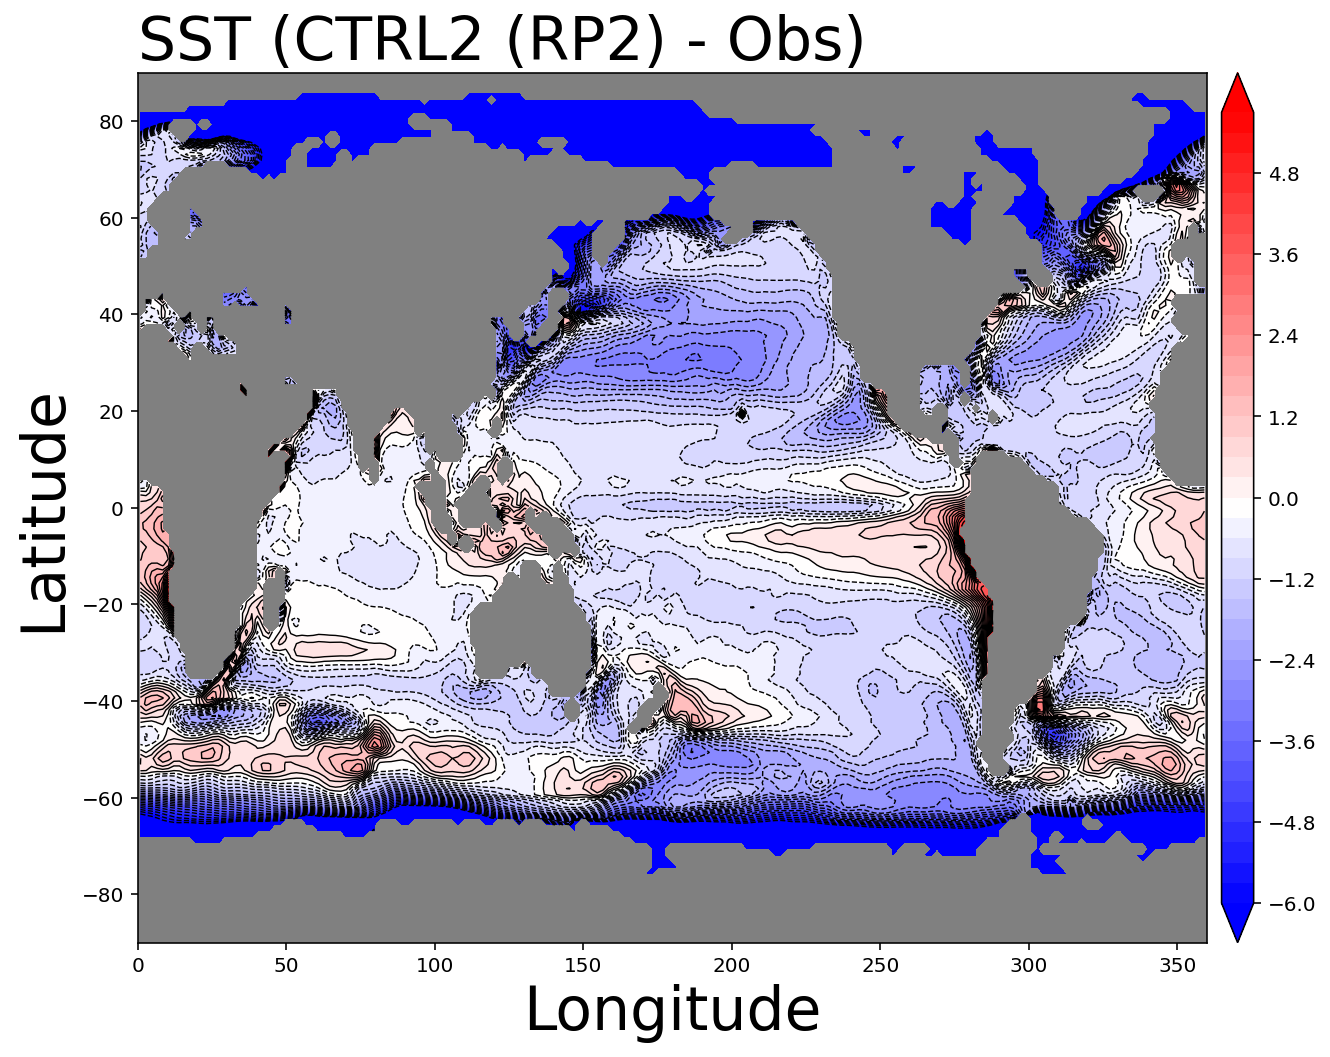

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

clev = np.arange(-6, 6, 0.3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plot = ax.contourf(ts240.lon, ts240.lat, ts240, cmap='bwr', levels=clev, extend='both')
ax.contour(ts240.lon, ts240.lat, ts240, levels=clev, colors='k', linewidths=0.7)

ax.set_xlabel('Longitude', fontsize=30)
ax.set_ylabel('Latitude', fontsize=30)
ax.set_xlim([0, 360])
ax.set_ylim([-90, 90])
ax.set_title('SST (CTRL2 (RP2) - Obs)', fontsize=30, loc='left')

# Create colorbar in a separate axes
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.1)
cb = plt.colorbar(plot, cax=cax, orientation='vertical')

ax.set_facecolor('grey')
plt.savefig('ctrl_new_rp2-obs_sst.png')
plt.show()


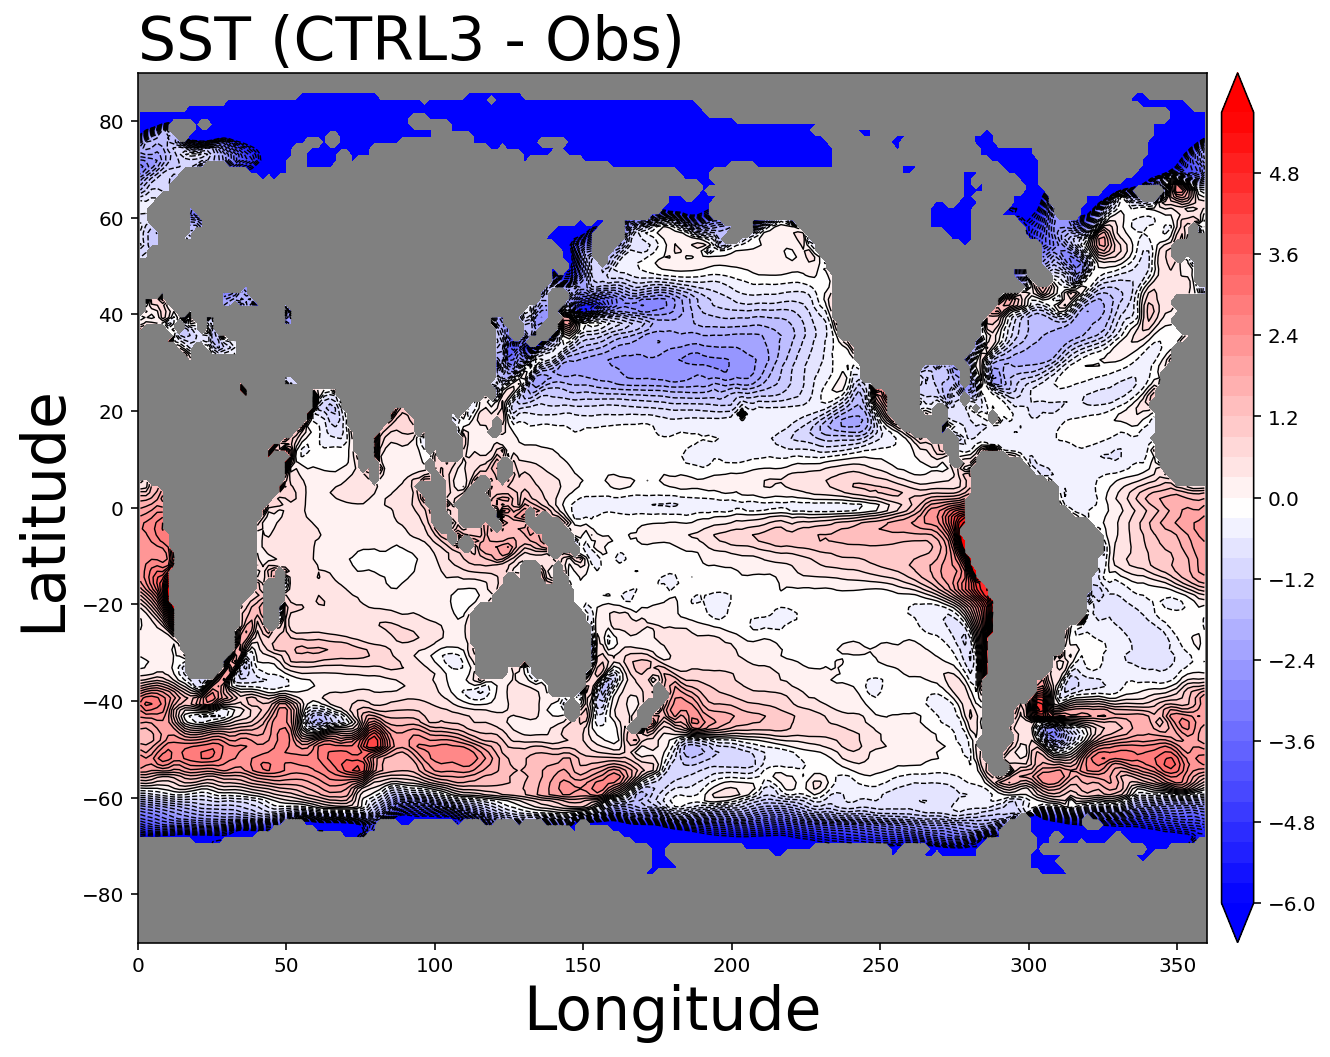

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

clev = np.arange(-6, 6, 0.3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plot = ax.contourf(ts340.lon, ts340.lat, ts340, cmap='bwr', levels=clev, extend='both')
ax.contour(ts340.lon, ts340.lat, ts340, levels=clev, colors='k', linewidths=0.7)

ax.set_xlabel('Longitude', fontsize=30)
ax.set_ylabel('Latitude', fontsize=30)
ax.set_xlim([0, 360])
ax.set_ylim([-90, 90])
ax.set_title('SST (CTRL3 - Obs)', fontsize=30, loc='left')

# Create colorbar in a separate axes
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.1)
cb = plt.colorbar(plot, cax=cax, orientation='vertical')

ax.set_facecolor('grey')
plt.savefig('ctrl_new-obs_sst.png')
plt.show()
